In [1]:
import torch
import subprocess
import numpy as np
import torch.optim as optim
from math import *
import model as model
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
dim = 2
potential1 = model.init_model(dim);

In [3]:
def compute_energy(dim1):
    kbT = (8.617343E-5) *10000
    beta = 1.0 / kbT
    xlist = np.linspace(-pi, pi, 100)
    Z = 0 *xlist
    input_test = torch.tensor(A).to(device)
    bias = torch.min(potential1.bias_potential(input_test,1))
    for x_index in range(np.size(xlist)):
        input_data = map_energy_surface(xlist[x_index],dim1,dim)
        F = potential1.bias_potential(input_data,1)-bias
#         print(torch.exp(-beta*F))
        Z[x_index] = -(kbT) * np.log(torch.sum(torch.exp(-beta*F)).cpu().detach().numpy())
    return xlist,Z

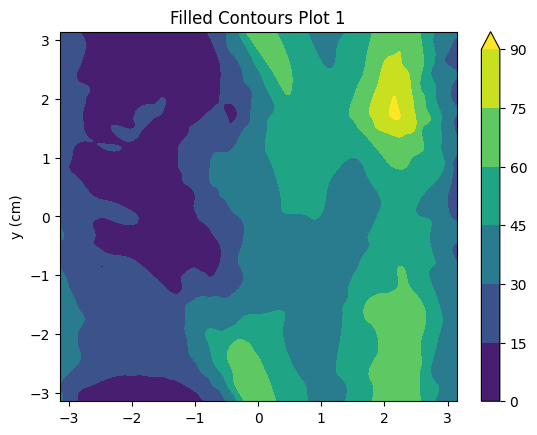

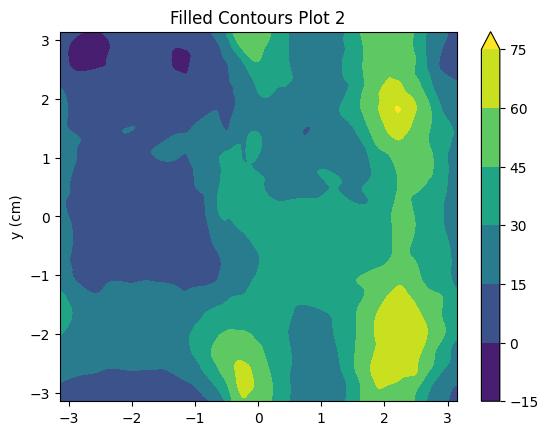

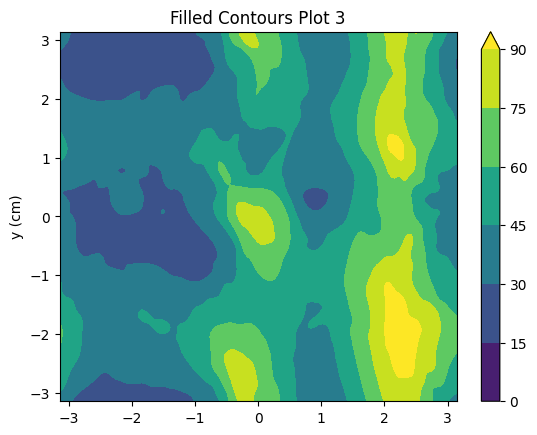

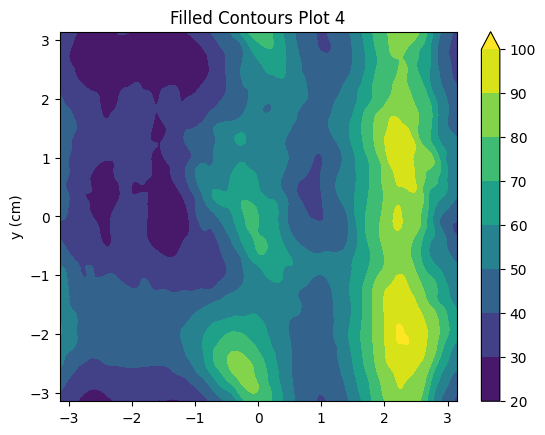

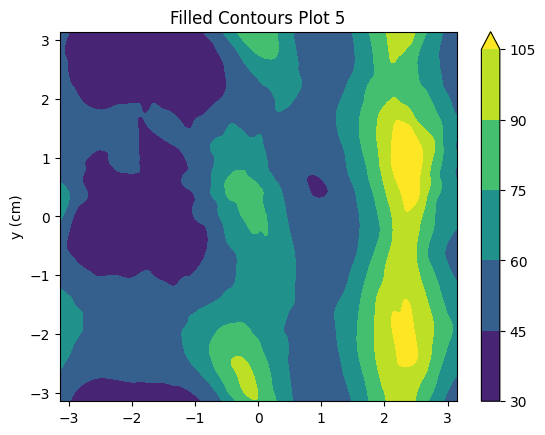

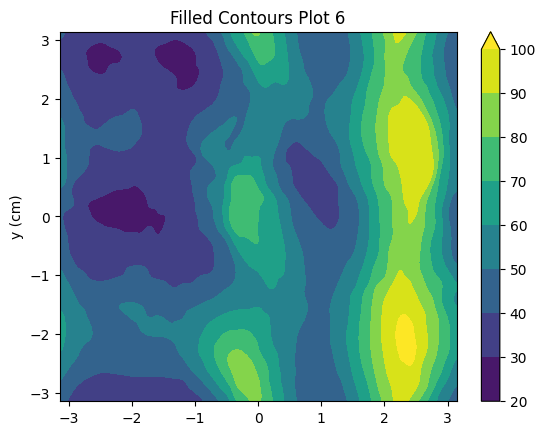

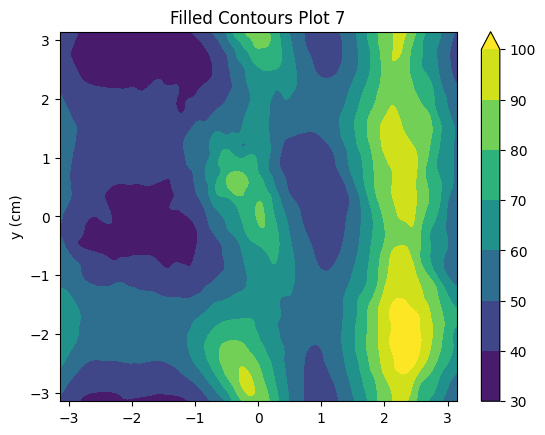

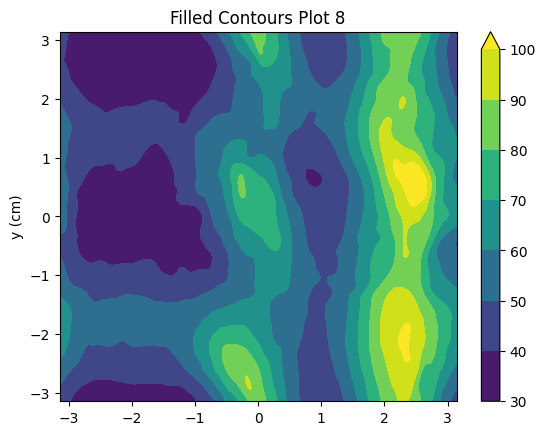

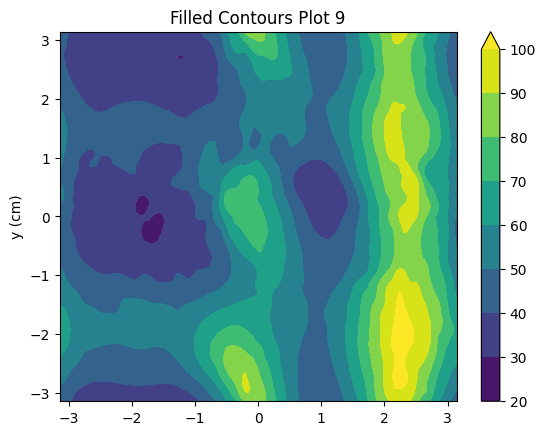

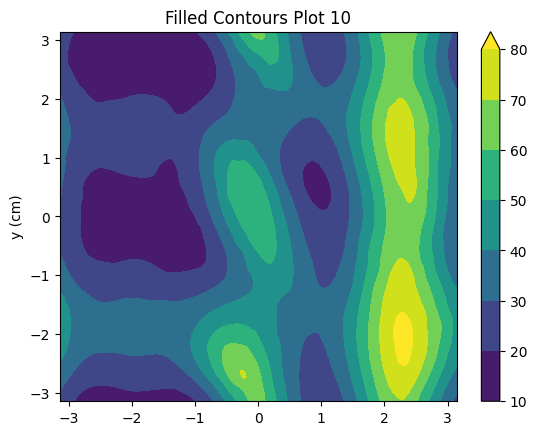

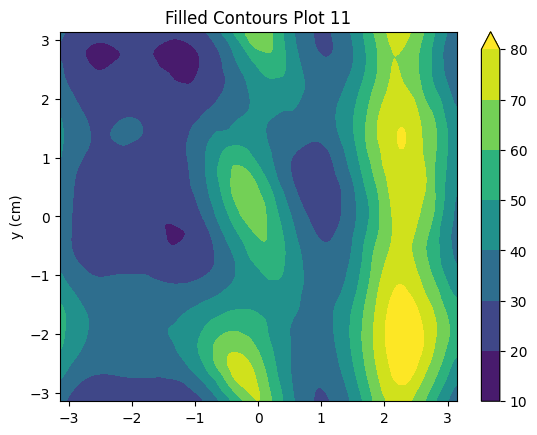

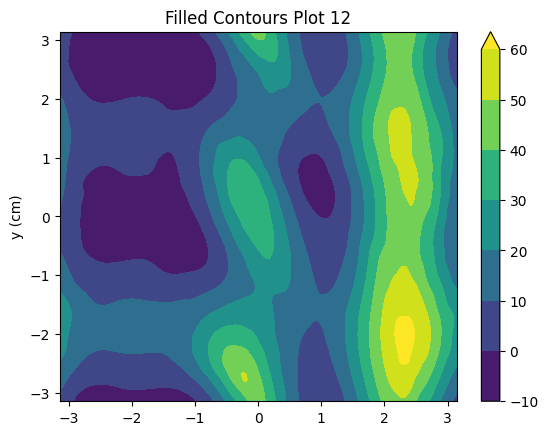

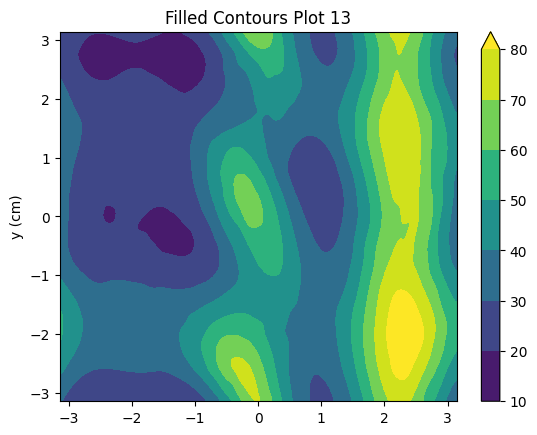

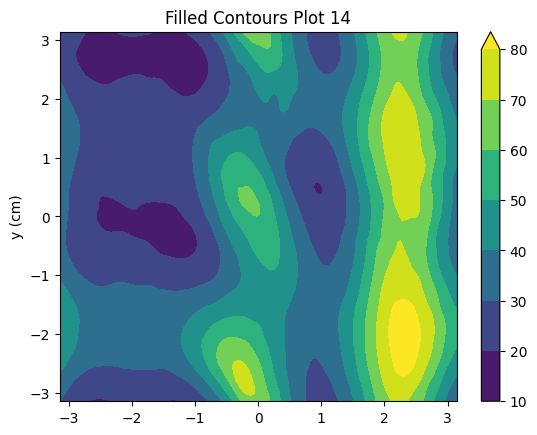

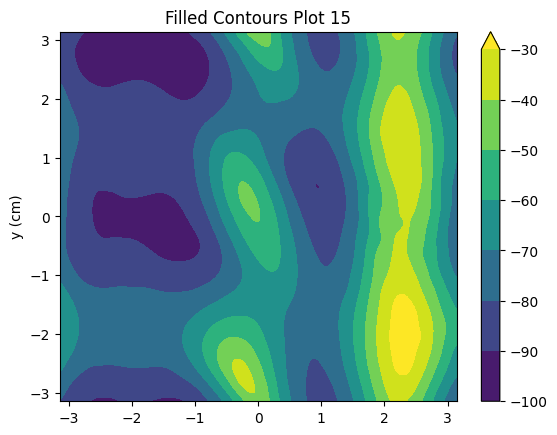

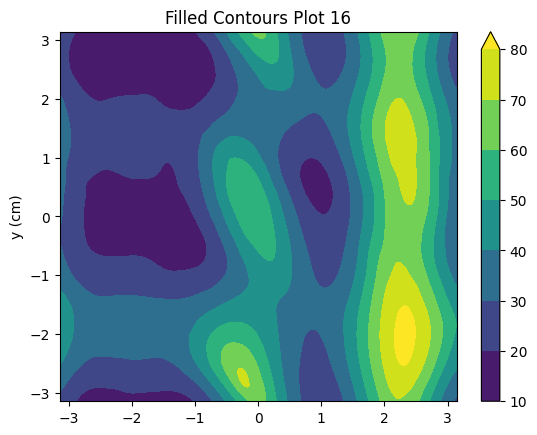

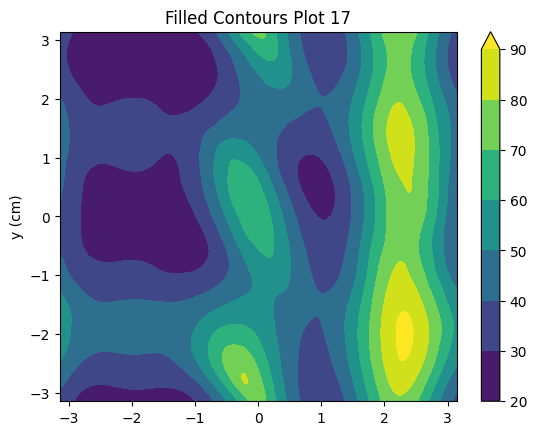

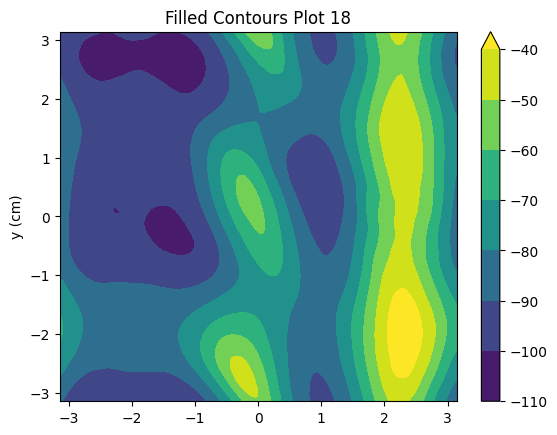

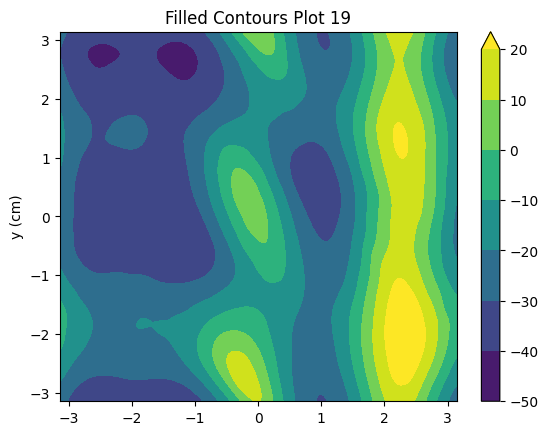

In [4]:
import matplotlib.pyplot as plt
device = "cpu"
for idx in range(1,20):
    potential1.load_state_dict(torch.load("./model_save/potential"+str(idx)+".pt"))
    potential1.to(device)
    xlist = np.linspace(-pi, pi, 301)
    ylist = np.linspace(-pi, pi, 301)
    X, Y = np.meshgrid(xlist, ylist)
    input =  torch.tensor(np.vstack((X.reshape(-1),Y.reshape(-1))),dtype=torch.float32).to(device)
    Z = potential1.bias_potential(input,1).reshape(301,301).cpu().detach().numpy()
    Z = gaussian_filter(Z, 2)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z,extend='max')
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title(f'Filled Contours Plot {idx}')
    #ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')
    
    plt.show()
    np.savez("data"+str(idx)+".npz",X=X,Y=Y,Z=Z)